 <img src="../dsi.png" style="height:128px;">

# Lesson 7: Data Visualization

So far on our journey through Python, you may have noticed that we’ve been working a lot with numbers and data, whether it's to perform single-step calculations or to manipulate entire tables. But wait... there's more! Today we'll learn to appreciate the power of programming to _visualise_ data. Scientists use diagrams, or _informative pictures_ to represent their work in a meaningful way. Now, we will do the same by programmatically generate graphs.
 
To do so, we will use a Python _library_ called `matplotlib`.
What is a library?
A Python library groups together a set of programs with capabilities that we can apply to many use cases. You might also hear people using the word "package" in a similar way as the word "library".
Where do these libraries come from?
There is a rich community of Python users online. People like you and me can create and share Python libraries. One benefit to having so many public libraries is that if you want to write code to do something, chances are there already exists a Python library to help you achieve your goal! Another good part about having so many public resources is that many are _well-documented_. This means that if you don't know how to use a library, you can look it up online and learn how to use it by reading the documentation!

`matplotlib` is a popular plotting/data visualization Python library that has a useful sub-collection of functions called `pyplot`. In addition to using `matplotlib.pyplot`, we'll also use `numpy` to help manipulate the data. The `datascience` library, which you've been using before for tables, can also help you make plots. 

In [2]:
# Run this cell to import, or load, the useful resources from Python libraries
# Remember, one way to run cells is to press `SHIFT`+`ENTER`

# We're using the nickname `np` for `numpy`!
import numpy as np

# We want all of the functions from the `datascience` package. (This lets you build Tables, etc.)
from datascience import *

# The star of the show! We are using the nickname `plt` for `pyplot`, which is found within `matplotlib`.
from matplotlib import pyplot as plt

# Just some display and formatting details
%matplotlib inline
plt.style.use('fivethirtyeight')

Note: The identifiers (nicknames) `np` and `plt` are what programmers conventionally use to abbreviate, or shorten, the longer names of the libraries. You could just as well use `ahaana` or `hamsa` or `maria` instead, and your code would still work! This won't make your program wrong, but following the conventions is recommended and does make your code easier to read. :)

### Example

Let’s start off using this new tool with an example. Plot a graph for the equation `y = 2x + 5`, where the values of x range from 1 to 10.

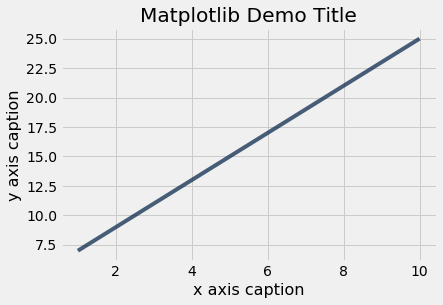

In [3]:
x = np.arange(1,11) # What does this do? Try seeing the output of `print(x)` to find out...
y = 2 * x + 5 # Is `y` equal to a single number or a set of numbers? Check by running `print(y)

#Here, we put x and y in a table
example = Table().with_columns("x", x,
                               "y", y)

# The line below plots the data. Try commenting out this line (Hint: use #), run the cell, and see what happens.
example.plot("x", "y") #The column we're representing horizontally goes first 
plt.title("Matplotlib Demo Title") # Adds a title to the plot
plt.xlabel("x axis caption") # Labelling both axes is a good practice!
plt.ylabel("y axis caption") # Labels let you know at a glance what data you've just represented.
plt.show()

Try it yourself! You you don't have to plot a linear function, x and y just have to be two different arrays.

In [ ]:
x = # Replace with a range of numbers
y = # Replace with an expression using `x`
your_table = 

your_table.plot("x", "y")
plt.title("Replace with a Title!") 
plt.xlabel("Don't forget to...") 
plt.ylabel("...label your axes!") 
plt.show()

## The British Raj

We've used Python to help us look at the present, but we can use data science to help give us a picture of the past that our history books can't.

The following table, `troops` (from http://dsal.uchicago.edu/statistics/) contains data about the amount of British soldiers (and Indian soldiers employed by the British) in different regions of India from 1840 to 1865. In 1857, Indian troops working for the British East India Company started a rebellion.

In [38]:
troops = Table.read_table("british_india_troops.csv")
troops

year,british_bengal,native_bengal,total_bengal,british_madras,native_madras,total_madras,british_bombay,native_bombay,total_bombay
1840,16303,102055,118358,12371,59711,72082,6930,38073,45003
1841,18873,106907,125780,11979,63183,75162,7554,42526,50080
1842,21114,109078,130192,12183,61378,73561,8816,42168,50984
1843,22007,113762,135769,14113,63804,77917,10606,43381,53987
1844,21645,112034,133679,14078,62547,76625,10517,41999,52516
1845,21783,133525,155308,14354,61953,76307,9974,44832,54806
1846,20445,133561,154006,12794,63217,76011,10775,43955,54730
1847,20898,132848,153746,12775,60904,73679,10650,53721,64371
1848,20596,114577,135173,12650,54806,67456,11024,51508,62532
1849,22727,124917,147644,12031,53697,65728,13135,50516,63651


In the previous session, we learned about *distributions* and we also learned that *histograms* are really useful for showing how data is distributed. Let's look at the distribution of British troops in Bombay over time. We use the `hist` function, and pass in the `british_bombay` column, as well as a range of values.

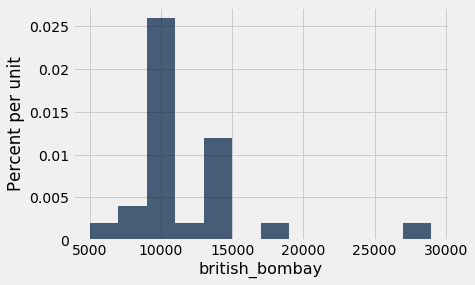

In [33]:
troops.hist("british_bombay", bins = np.arange(5000, 30000, 2000))

Let's try to make sense of what this says. The vertical axis says "percent per unit," and in this scenario, we're graphing the amount of soldiers, so a "unit" is a soldier. We know that the horizontal axis shows us the amount of troops, but what else do we know about it? This is where the `bins` parameter comes in.

Do you remember what `np.arange` does with two parameters? Check out what it does with three!

In [34]:
np.arange(5000, 30000, 2000)

array([ 5000,  7000,  9000, 11000, 13000, 15000, 17000, 19000, 21000,
       23000, 25000, 27000, 29000])

When you pass in a third parameter, `np.arange` doesn't give us an array of *all* the values up to a certain number, it gives us values in *increments*, in this case, of 2000.

This means each "bin" contains all the data points which fell within its interval. Take a look at the largest bar on the histogram. It contains all the values in the `british_bombay` column that are between 9000 and 11000. 

In [35]:
#We multiply the column's width by its height to get the percentage of troops in that bin
2000 * 0.025

50.0

This means that in half the years during this time interval, there were between 9,000 and 11,000 British soldiers stationed in Bombay.

Now, make a histogram for all the British troops in India during this time period.

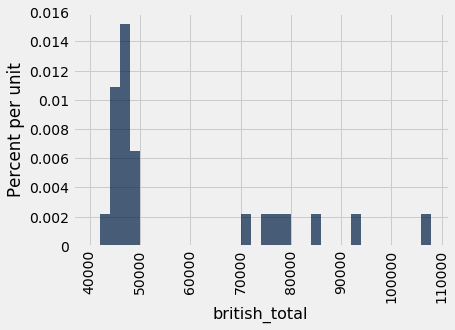

In [49]:
#Add up all the arrays containing British troops. 
#Hint: Access a column from the table by saying troops.column() and passing in the name
british_total = 
with_total = troops.with_column("british_total", british_total)
with_total.hist("______", bins = np.arange(40000, 110000, 2000))

Let's check out one way in which line graphs are useful– showing change over time. 

Here, let's look at how many native Indian troops the British hired during this time period.

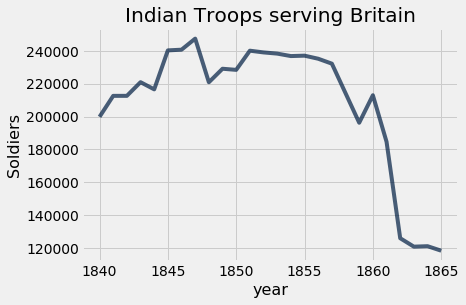

In [6]:
native_troops = troops.column("native_bengal") + troops.column("native_madras") + troops.column("native_bombay")
native_count = Table().with_columns("year", troops.column("year"),
                                    "native_total", native_troops)
native_count.plot("year", "native_total")
plt.ylabel("Soldiers")
plt.title("Indian Troops serving Britain")

What can you tell about the graph? Based on this graph, how do you think the British responded to the rebellion?

Now, it's your turn. Try plotting a similar graph with data about British forces. Make a table called *british_count* that contains two columns: *year* and *british_total*. 

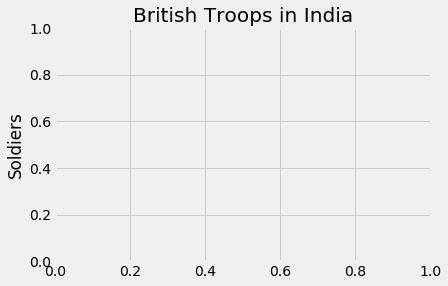

In [7]:
#Use your array of British troops from the previous question.

british_count = Table().with_columns(


)
plt.ylabel("Soldiers")
plt.title("British Troops in India")

What do you see when comparing the graph of British troops to Indian troops recruited by the British? How do you think the 1857 revolt affected the number of soldiers Britain sent to its Indian colonies?

## Foreign Tourists

In the last exercise, we saw how we could use Python tools visualize how the number of soldiers in India evolved over time. Now we will see how the same tools can be used to compare multiple sets of data and analyze differences and similarities.

The following dataset tells us the number of foreign tourists who visited several countries from 2001 to 2010.

In [53]:
tourists = Table.read_table("foreign_tourists.csv")
tourists

Nationality,Region,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Canada,NORTH AMERICA,88600,93598,107671,135884,157643,176567,208214,222364,224069,242372
U.S.A.,NORTH AMERICA,329147,348182,410803,526120,611165,696739,799062,804933,827140,931292
Total,NORTH AMERICA,417747,441780,518474,662004,768808,873306,1007276,1027297,1051209,1173664
Argentina,CENTRAL AND SOUTH AMERICA,2906,1359,1805,2799,3313,4493,4992,5087,6011,7626
Brazil,CENTRAL AND SOUTH AMERICA,3819,3622,4528,7397,7005,9148,10788,11530,13964,15219
Mexico,CENTRAL AND SOUTH AMERICA,3473,3105,3563,4570,5398,6502,8299,9272,8185,10458
Others,CENTRAL AND SOUTH AMERICA,11727,9586,11758,13399,19870,18602,18240,17616,18444,29425
Total,CENTRAL AND SOUTH AMERICA,21925,17672,21654,28165,35586,38745,42319,43505,46604,62728
Austria,WESTERN EUROPE,17787,13801,16903,21093,27187,28045,26692,25900,27930,32620
Belgium,WESTERN EUROPE,18851,13945,17309,24007,25596,29156,34207,36277,34759,37709


Now let's isolate the rows in this table that have the total tourism data for each region using the `where` function.

In [54]:
tourists_by_region = tourists.where("Nationality", "Total") # returns all rows whose value for "Nationality" is "Total"
tourists_by_region

Nationality,Region,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Total,NORTH AMERICA,417747,441780,518474,662004,768808,873306,1007276,1027297,1051209,1173664
Total,CENTRAL AND SOUTH AMERICA,21925,17672,21654,28165,35586,38745,42319,43505,46604,62728
Total,WESTERN EUROPE,819973,726783,847966,1128297,1282119,1487271,1686083,1709525,1634042,1750342
Total,EASTERN EUROPE,38863,40628,55252,82426,101445,121309,152764,191110,183475,227650
Total,AFRICA,90962,83457,93353,115493,134801,142813,157485,141750,164474,204525
Total,WEST ASIA,96424,92562,103596,122808,133821,146693,171661,215542,204843,235317
Total,SOUTH ASIA,672133,630653,666889,790698,841969,908916,982428,1051846,1001401,1047444
Total,SOUTH EAST ASIA,139975,149291,168926,209110,241408,281726,303475,332925,360191,439043
Total,EAST ASIA,130464,115424,150506,201627,223567,282985,352037,355230,322797,411947
Total,AUSTRALASIA,66104,63261,73849,100944,119778,137436,167063,178308,182451,210275


In today's lesson, we learned about pie charts, a way to represent different categories of data and see their relative percentages to each other. Now we will use Matplotlib to compare the amount of tourists from each region. Let's do this for the first year, 2001.

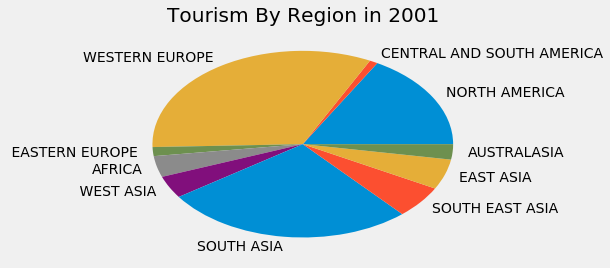

In [19]:
tourists_in_2001 = Table().with_columns("Region", tourists_by_region.column("Region"),
                                        "Count", tourists_by_region.column("2001"))
plt.pie(tourists_in_2001.column("Count"), labels=tourists_in_2001.column("Region"))
plt.title("Tourism By Region in 2001")

Look at how we used Matplotlib to create a colorful pie chart showing the differences in tourism to India! We can immediately see that tourism was highest in Western Europe, followed by South Asia and North America. Much clearer than looking at a table of numbers.

Now it's your turn. This pie chart tells us which region (Western Europe) the most tourists were from - but what countries in Western Europe did most of them come from? See if you can make a pie chart comparing the relative percentagages of tourism from the different countries in Western Europe for the year 2001.

In [ ]:
#Try getting the rows in the table corresponding to Western Europe
tourists_to_europe = tourists.where(    )
tourists_to_europe

Next, fill in the following code to select the "Nationality" and "2001" columns and plot the data!

In [ ]:
tourists_in_2001 = Table().with_columns(


)
plt.pie(tourists_in_2001.column("Count"), labels=tourists_in_2001.column("Nationality"))
plt.title("Tourism By Country in 2001 Western Europe")

Nice! But pie charts weren't the only type of plot you learned about in today's lesson. You also learned about *histograms*, which show the *distribution* of a set of data.

In [55]:
tourists_by_region = tourists.where("Nationality", "Total") # returns all rows whose value for "Nationality" is "Total"
tourists_by_region

Nationality,Region,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Total,NORTH AMERICA,417747,441780,518474,662004,768808,873306,1007276,1027297,1051209,1173664
Total,CENTRAL AND SOUTH AMERICA,21925,17672,21654,28165,35586,38745,42319,43505,46604,62728
Total,WESTERN EUROPE,819973,726783,847966,1128297,1282119,1487271,1686083,1709525,1634042,1750342
Total,EASTERN EUROPE,38863,40628,55252,82426,101445,121309,152764,191110,183475,227650
Total,AFRICA,90962,83457,93353,115493,134801,142813,157485,141750,164474,204525
Total,WEST ASIA,96424,92562,103596,122808,133821,146693,171661,215542,204843,235317
Total,SOUTH ASIA,672133,630653,666889,790698,841969,908916,982428,1051846,1001401,1047444
Total,SOUTH EAST ASIA,139975,149291,168926,209110,241408,281726,303475,332925,360191,439043
Total,EAST ASIA,130464,115424,150506,201627,223567,282985,352037,355230,322797,411947
Total,AUSTRALASIA,66104,63261,73849,100944,119778,137436,167063,178308,182451,210275


Let's use bar graphs to see what the differences in tourism between the regions were for a different year: 2010. First we'll get the "Region" and "2010" columns, then we'll use matplotlib to plot this data in a bar graph.

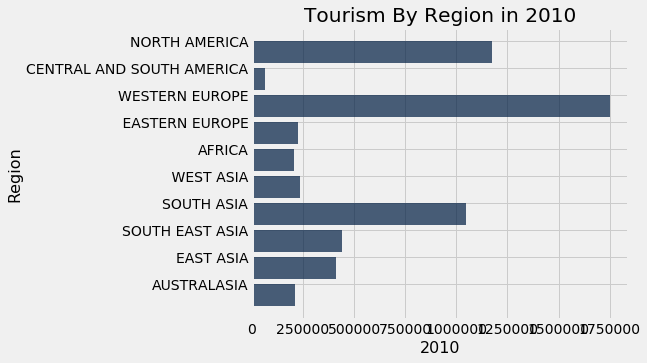

In [60]:
regions = tourists_by_region.column("Region")
tourist_counts = tourists_by_region.column("2010")
tourists_by_region.barh("Region", "2010")
plt.title("Tourism By Region in 2010")


What's the point of bar graphs if we already have pie charts? Well by comparing the length of the bars it might be easier to distinguish between two categories that have very similar counts. And the labeled x axis also tells us approximately how many tourists visited each region, something missing in the pie chart.

Now it's your turn again. Try to make a bar graph comparing the number of tourists to different countries in South Asia for the year 2010.

In [ ]:
#Try getting the rows in the table corresponding to South Asia
tourists_to_southasia = tourists.where(    )
tourists_to_southasia

Now fill in the following code to select the "Nationality" and "2010" columns and plot the data!

In [ ]:
countries = 
tourist_counts = 
ticks = np.arange(len(countries)) # this tells matplotlib how to arrange the bars

plt.barh(ticks, tourist_counts)
plt.yticks(ticks, countries) # for labeling the bars
plt.xlabel("Tourists")
plt.title("Tourism By Country in 2010 South Asia")